# **Linear Regression**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from helper import (plot_exponential_data,plot_square_normal_data)
import warnings
warnings.simplefilter("ignore")

loading in Boston data

In [ ]:
from helper import boston_dataframe
boston_data=boston_dataframe()

In [ ]:
boston_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


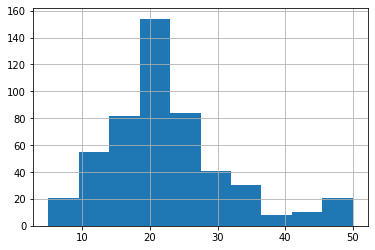

In [ ]:
boston_data.MEDV.hist()

Does not look normal due to that right tail. Let's try to verify statistically:

In [ ]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a "p-value". The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [ ]:
normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

p-value extremely low. Our y variable we've been dealing with this whole time was not normally distributed!

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed: 

* Log
* Square root
* Box cox

**testing log**

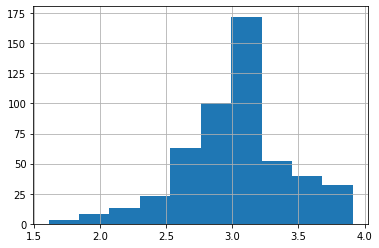

In [ ]:
log_medv = np.log(boston_data.MEDV)
log_medv.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d94352c90>]],
      dtype=object)

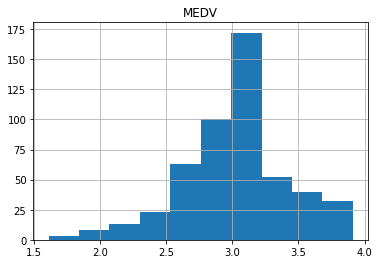

In [ ]:
log_medv = pd.DataFrame(np.log(boston_data.MEDV))
log_medv.hist(bins=10)

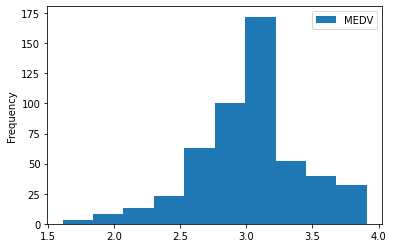

In [ ]:
ax=log_medv.plot.hist(bins=10)

In [ ]:
normaltest(log_medv)

NormaltestResult(statistic=masked_array(data=[17.21801696640698],
             mask=[False],
       fill_value=1e+20), pvalue=array([0.00018245]))

Conclusion: closer, but still not normal.

**testing square root**

(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <a list of 10 Patch objects>)

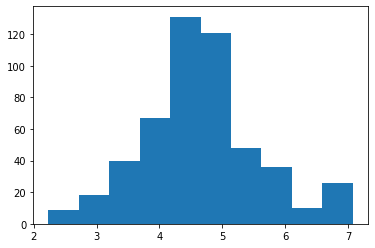

In [ ]:
sqrt_medv = np.sqrt(boston_data.MEDV)
plt.hist(sqrt_medv)

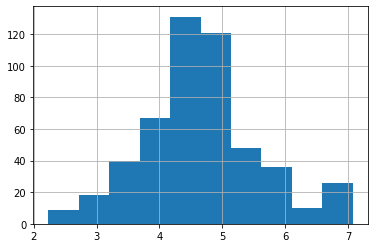

In [ ]:
sqrt_medv.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d943e7310>]],
      dtype=object)

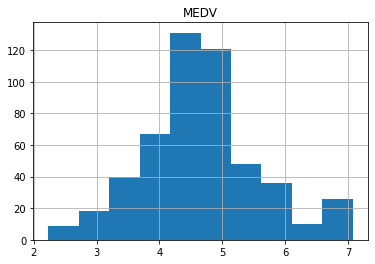

In [ ]:
sqrt_medv = pd.DataFrame(sqrt_medv)
sqrt_medv.hist(bins=10)

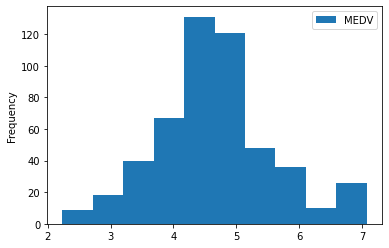

In [ ]:
sqrt_medv.plot.hist(bins=10)

In [ ]:
normaltest(sqrt_medv)

NormaltestResult(statistic=masked_array(data=[20.487090826863067],
             mask=[False],
       fill_value=1e+20), pvalue=array([3.5586457e-05]))

**testing boxcox**

In [ ]:
from scipy.stats import boxcox

In [ ]:
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [ ]:
len(bc_result)

2

In [ ]:
lam

0.2166209012915364

lam is the best lambda for the distribution

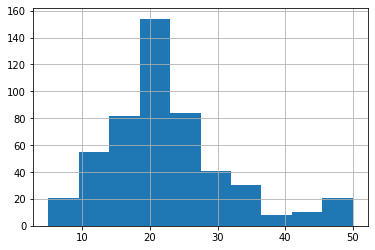

In [ ]:
boston_data['MEDV'].hist()

(array([  4.,  15.,  17.,  49.,  68., 151.,  99.,  50.,  23.,  30.]),
 array([1.92564954, 2.3487372 , 2.77182485, 3.1949125 , 3.61800016,
        4.04108781, 4.46417546, 4.88726311, 5.31035077, 5.73343842,
        6.15652607]),
 <a list of 10 Patch objects>)

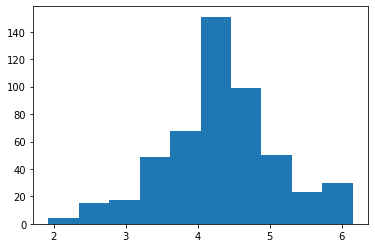

In [ ]:
plt.hist(boxcox_medv)

In [ ]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

Significantly more normally distributed (according to p value) than the other two distributions - above 0.05, even!

Now that we have a normally distributed y-variable, let's try a regression!

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [ ]:
lr = LinearRegression()

Reload clean version of boston_data:

In [ ]:
boston_data = boston_dataframe()

In [ ]:
y_col = "MEDV"

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]

In [ ]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

In [ ]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [ ]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data

In [ ]:
y_train_bc.shape

(354,)

In [ ]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

**inverse transform**

In [ ]:
from scipy.special import inv_boxcox

In [ ]:
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [ ]:
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [ ]:
boston_data['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

**R^2 Score**

In [ ]:
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_pred_tran,y_test)

0.8794001851338568

## LAB Exercise: 

### Determine the R^2 of a LinearRegression without the box cox transformation. Is it higher or lower?

In [ ]:
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(y_test,lr_pred)

0.8687609133106017

# **Training and Tests splits**

In [ ]:
import pandas as pd
import numpy as np
filepath='ameshousing.csv'
data=pd.read_csv(filepath,sep=',')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

In [ ]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

In [ ]:
data.value_counts()

1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BldgType  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2  BsmtFullBath  BsmtHalfBath  BsmtQual  BsmtUnfSF  CentralAir  Condition1  Condition2  Electrical  EnclosedPorch  ExterCond  ExterQual  Exterior1st  Exterior2nd  Fence  FireplaceQu  Fireplaces  Foundation  FullBath  Functional  GarageArea  GarageCars  GarageCond  GarageFinish  GarageQual  GarageType  GarageYrBlt  GrLivArea  HalfBath  Heating  HeatingQC  HouseStyle  KitchenAbvGr  KitchenQual  LandContour  LandSlope  LotArea  LotConfig  LotFrontage  LotShape  LowQualFinSF  MSSubClass  MSZoning  MasVnrArea  MasVnrType  MiscFeature  MiscVal  MoSold  Neighborhood  OpenPorchSF  OverallCond  OverallQual  PavedDrive  PoolArea  PoolQC  RoofMatl  RoofStyle  SaleCondition  SaleType  ScreenPorch  Street  TotRmsAbvGrd  TotalBsmtSF  Utilities  WoodDeckSF  YearBuilt  YearRemodAdd  YrSold  SalePrice
4692.0    950.0     0.0        None   3             1Fam      TA     

In [ ]:
df=data
one_hot_encoding=df.dtypes[df.dtypes==int]
one_hot_encoding.head()

BedroomAbvGr    int64
BsmtFullBath    int64
BsmtHalfBath    int64
Fireplaces      int64
FullBath        int64
dtype: object

In [ ]:
one_hot_encoding = one_hot_encoding.index.tolist()
df[one_hot_encoding].head()

,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,Fireplaces,FullBath,GarageCars,HalfBath,KitchenAbvGr,MSSubClass,MoSold,OverallCond,OverallQual,TotRmsAbvGrd,YearBuilt,YearRemodAdd,YrSold
0,3,1,0,0,2,2,1,1,60,2,5,7,8,2003,2003,2008
1,3,0,1,1,2,2,0,1,20,5,8,6,6,1976,1976,2007
2,3,1,0,1,2,2,1,1,60,9,5,7,6,2001,2002,2008
3,3,1,0,1,1,3,0,1,70,2,5,7,7,1915,1970,2006
4,4,1,0,1,2,3,1,1,60,12,5,8,9,2000,2000,2008


In [ ]:
mask=data.dtypes==np.object
object_cols=data.columns[mask]
print(mask)


1stFlrSF        False
2ndFlrSF        False
3SsnPorch       False
Alley            True
BedroomAbvGr    False
                ...  
WoodDeckSF      False
YearBuilt       False
YearRemodAdd    False
YrSold          False
SalePrice       False
Length: 80, dtype: bool


In [ ]:
print(object_cols)

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')


In [ ]:
len(object_cols)

43

In [ ]:
num_object_cols=(data[object_cols].apply(lambda x: x.nunique()).sort_values(ascending=False))

In [ ]:
len(num_object_cols)

43

In [ ]:
print(num_object_cols)

Neighborhood     25
Exterior2nd      16
Exterior1st      14
SaleType          9
Condition1        9
HouseStyle        8
RoofMatl          8
Condition2        8
Functional        7
BsmtFinType2      7
FireplaceQu       6
Foundation        6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
Heating           6
GarageType        6
BsmtExposure      5
Electrical        5
Fence             5
GarageCond        5
GarageQual        5
BsmtQual          5
LotConfig         5
MSZoning          5
MiscFeature       5
BldgType          5
HeatingQC         5
KitchenQual       4
LandContour       4
BsmtCond          4
LotShape          4
MasVnrType        4
ExterQual         4
ExterCond         4
PoolQC            4
Alley             3
GarageFinish      3
LandSlope         3
PavedDrive        3
CentralAir        2
Street            2
Utilities         2
dtype: int64


In [ ]:
#no need to encode if there is one value
small_num_object_cols=num_object_cols.loc[num_object_cols>1]
#number of one_hot_cols is one less than number of categories
small_num_object_cols-=1

small_num_object_cols.sum()


215

In [ ]:
print(small_num_object_cols)

Neighborhood     24
Exterior2nd      15
Exterior1st      13
SaleType          8
Condition1        8
HouseStyle        7
RoofMatl          7
Condition2        7
Functional        6
BsmtFinType2      6
FireplaceQu       5
Foundation        5
RoofStyle         5
SaleCondition     5
BsmtFinType1      5
Heating           5
GarageType        5
BsmtExposure      4
Electrical        4
Fence             4
GarageCond        4
GarageQual        4
BsmtQual          4
LotConfig         4
MSZoning          4
MiscFeature       4
BldgType          4
HeatingQC         4
KitchenQual       3
LandContour       3
BsmtCond          3
LotShape          3
MasVnrType        3
ExterQual         3
ExterCond         3
PoolQC            3
Alley             2
GarageFinish      2
LandSlope         2
PavedDrive        2
CentralAir        1
Street            1
Utilities         1
dtype: int64


**One hot encoder**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
data_ohc=data.copy()
ohc=OneHotEncoder(drop='first')

In [ ]:
num_object_cols.index

Index(['Neighborhood', 'Exterior2nd', 'Exterior1st', 'SaleType', 'Condition1',
       'HouseStyle', 'RoofMatl', 'Condition2', 'Functional', 'BsmtFinType2',
       'FireplaceQu', 'Foundation', 'RoofStyle', 'SaleCondition',
       'BsmtFinType1', 'Heating', 'GarageType', 'BsmtExposure', 'Electrical',
       'Fence', 'GarageCond', 'GarageQual', 'BsmtQual', 'LotConfig',
       'MSZoning', 'MiscFeature', 'BldgType', 'HeatingQC', 'KitchenQual',
       'LandContour', 'BsmtCond', 'LotShape', 'MasVnrType', 'ExterQual',
       'ExterCond', 'PoolQC', 'Alley', 'GarageFinish', 'LandSlope',
       'PavedDrive', 'CentralAir', 'Street', 'Utilities'],
      dtype='object')

In [ ]:
data['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1374    Gilbert
1375     NWAmes
1376    Crawfor
1377      NAmes
1378    Edwards
Name: Neighborhood, Length: 1379, dtype: object

In [ ]:
data[['Neighborhood']]##dataframe

,Neighborhood
0,CollgCr
1,Veenker
2,CollgCr
3,Crawfor
4,NoRidge
...,...
1374,Gilbert
1375,NWAmes
1376,Crawfor
1377,NAmes


In [ ]:
for col in num_object_cols:
  #one hot encode the data this returns the sparse array
  new_data=ohc.fit_transform(data_ohc[['Neighborhood']])

In [ ]:
new_data

<1379x24 sparse matrix of type '<class 'numpy.float64'>'
	with 1362 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(new_data)

,0
0,"(0, 4)\t1.0"
1,"(0, 23)\t1.0"
2,"(0, 4)\t1.0"
3,"(0, 5)\t1.0"
4,"(0, 14)\t1.0"
...,...
1374,"(0, 7)\t1.0"
1375,"(0, 13)\t1.0"
1376,"(0, 5)\t1.0"
1377,"(0, 11)\t1.0"


In [ ]:
pd.DataFrame(new_data.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1376,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cats=ohc.categories_
cats

[array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object)]

# **Cross Validation**

In [ ]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import KFold,cross_val_predict
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

pickle saves python objects its like dictionary

In [ ]:
boston=pickle.load(open('/content/bouston_housing_clean.pickle','rb'))

In [ ]:
boston.keys()

dict_keys(['dataframe', 'description'])

In [ ]:
boston_data=boston['dataframe']
boston_description=boston['description']

we pulled out boston_dataframe as for pandas dataframe

In [ ]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


our goal is going to be, how can we predict feature values when we only have the data available to us in this dataset? So what we're going to want to do is use KFolds and separate out into three different folds, three different train and test sets, and we want to think about how are we going to do this in Python code. 

So x is just going to be equal to boston_data, and we're doing.drop just to remove the outcome variable, and then y is just going to be equal to the outcome variable

In [ ]:
x=boston_data.drop('MEDV',axis=1)
y=boston_data.MEDV

In [ ]:
kf=KFold(shuffle=True,random_state=72011,n_splits=3)

We're going to have three folds, meaning three training sets and three test sets, where none of the test sets are going to overlap. If you recall from lecture, the training sets can overlap, but the test sets have to be exclusive so that we are looking at different test sets every single time.

In [ ]:
kf.split(x)

<generator object _BaseKFold.split at 0x7fb0c6b1cb50>

That's going to give us a generator object. That generator object you can think of as a list. A list where each value in that list is a tuple. That tuple is going to be first, all the indices that we want to set to our train index, and the second part of that tuple is going to be the test index. So it's going to be three tuples,

In [ ]:
x.shape

(506, 13)

We have our train index, that's just going to be a list of numbers, and that list of numbers is going to be somewhere between, let's just look at x.shape, it's going to be within 506. So values between zero and 505,

In [ ]:
x.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [ ]:
for train_index,test_index in kf.split(x):
    print("Train_index",train_index[:10],len(train_index))
    print("Test_index",test_index[:10],len(test_index))

Train_index [ 1  2  5 10 14 15 16 19 22 23] 337
Test_index [ 0  3  4  6  7  8  9 11 12 13] 169
Train_index [ 0  3  4  5  6  7  8  9 10 11] 337
Test_index [ 1  2 15 16 22 23 25 26 27 33] 169
Train_index [ 0  1  2  3  4  6  7  8  9 11] 338
Test_index [ 5 10 14 19 24 35 37 41 45 48] 168


Remember, the train indices can overlap, and you should see some overlap. Here, you see the two and the two, two and two, and there should be some overlap, but the tests indices will not have any overlap. These are each going to be unique and these are going to be different holdout sets

We're going to set our x_train, x_test, y_train, and y_test to the following outputs. It's going to be x, so our original x with all of our rows, but we're only going to take the rows for our first train index, and we're obviously going to take all of our columns from x. We're then going to set to x_test all of our test indices. So now we've set the x_train and the x_test. Then y_train is just going to be y and it's going to be the matching train index to our x_train that we specified first, and then we're going to set our y towards the test index to match up with the x_test index

In [ ]:
scores=[]
lr=LinearRegression()
for train_index,test_index in kf.split(x):
    x_train,x_test,y_train,y_test=(x.iloc[train_index,:],x.iloc[test_index,:],y[train_index],y[test_index])
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    score=r2_score(y_test.values,y_pred)
    scores.append(score)
scores


[0.7490635794803917, 0.7067454648932306, 0.6858880335748618]

In [ ]:
scores=[]
lr=LinearRegression()
s=StandardScaler()
for train_index,test_index in kf.split(x):
    x_train,x_test,y_train,y_test=(x.iloc[train_index,:],x.iloc[test_index,:],y[train_index],y[test_index])
    x_train_s=s.fit_transform(x_train)
    lr.fit(x_train_s,y_train)
    x_test_s=s.transform(x_test)
    y_pred=lr.predict(x_test_s)
    score=r2_score(y_test.values,y_pred)
    scores.append(score)
scores

[0.749063579480393, 0.7067454648932313, 0.685888033574861]

we see here that our scores are exactly the same and that's because for vanilla linear regression, without any regularization, and that's going to be a term we'll introduce later on, but the idea there being that there's lasso and ridge, which we talked about, which will allow you to prevent overfitting. Those will need you to scale your data for regular linear regression. Scaling won't actually affect performance

Pipelines are going to allow you to chain together multiple operators on your data as long as they each have a fit method. They all have to have a fit method, and then on top of that, every step leading up to the last step has to have a fit and transform so that the output of one can be the input of the next step. So you can chain together more than two steps. You can chain together 10 steps as long as each one of those steps has fit transform, and the last step has fit

In [ ]:
lr=LinearRegression()
s=StandardScaler()


In [ ]:
estimator=Pipeline([('scaler',s),('regression',lr)])

Our pipeline's going to have two steps. First, it will scale our data, then it will pass that through to a linear regression.

In [ ]:
estimator.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [ ]:
estimator.predict(x_test)

array([25.33172158, 19.75515371, 19.42043739, 18.08582615, 15.95332724,
       23.16407849, 22.47358509, 28.44943984, 21.6586703 ,  9.7542986 ,
       21.4080268 , 24.00702143, 27.81817133, 25.23935958, 33.11485333,
       29.93236676, 21.93809229, 24.56712805, 24.36649537, 23.32351705,
       23.49548334, 22.00921077, 30.70794209, 30.94728631, 28.70875562,
       35.84501085, 24.85921837, 18.2607698 , 20.60875609, 22.77182025,
       23.06442042, 21.9071854 , 20.81483047, 20.70092127, 15.05943591,
       20.64108775, 19.9201418 , 20.58033668, 13.87019995, 14.26945224,
        7.70096275, 14.25703118, 17.13328955, 18.34159388, 16.74629259,
       20.20255956, 33.14178128, 28.21296185, 42.78678244, 28.37306475,
       25.37176186, 24.84739465, 31.09653538, 33.67779337, 24.27738674,
       32.99330445, 32.19228019, 31.46015316, 36.448578  , 33.18537893,
       35.16873405, 37.60183857, 23.87048578, 17.95991148, 16.67417416,
       16.7902173 , 22.39614967, 25.28912123, 11.47183892, 24.38

Now, rather than doing that for-loop, if we want to get the prediction for each one of our holdout sets in our K-folds, we can use this function called cross val predict.

In [ ]:
kf

KFold(n_splits=3, random_state=72011, shuffle=True)

We're going to pass in that K-folds object here into our cross val predict, which is why we reintroduced it. We're going to say, I want to form my estimator, and that's the pipeline that we created above. For my initial values of x, so no splits, the cross val predict will do the splitting for you. For my initial y, I want to pass in how many folds? So you can say I want the K-folds object that we specified here, which will ensure that you're not just passing in three splits, but also that it's a shuffle, it'll be a specific type of split. You could also just pass into here for your CV, the number 3, and that will create three splits, but they may not be shuffled. This allows you to specify exactly how you want it to split.

In [ ]:
predictions=cross_val_predict(estimator,x,y,cv=kf)

In [ ]:
len(predictions)

506

In [ ]:
r2_score(y,predictions)

0.7170401442366913

In [ ]:
np.mean(scores)

0.7138990259828284

What's important to note is that the cross val predicts did not actually fit the model at any step along the way. It's going to give you all the outputs, but it essentially came up with three different models; one trained on the first two-thirds, one trained on the next two-thirds, and so on.

Well, actually, we've refit our estimator, but otherwise, I wouldn't be able to run estimator.predict.

We can't here because I fit it backup here. But otherwise, after you run cross val predict, just be aware that the estimator had never been fitted

**Hyper parameter tuning**

numpy.geomspace

numpy.geomspace(start, stop, num=50, endpoint=True, dtype=None, axis=0)

Return numbers spaced evenly on a log scale (a geometric progression).


This is similar to logspace, but with endpoints specified directly. Each output sample is a constant multiple of the previous.

In [ ]:
np.geomspace(1,27,4)

array([ 1.,  3.,  9., 27.])

In [ ]:
np.geomspace(10,99,4)

array([10.        , 21.47229169, 46.10593104, 99.        ])

In [ ]:
import numpy as np
np.geomspace(1e-09,1,10)

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

**LASSO**

class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [ ]:
scores=[]
coefs=[]
for alpha in alphas:
    las=Lasso(alpha,max_iter=100000)
    estimator=Pipeline([('scaler',s),('Lasso regression',las)])
    predictions=cross_val_predict(estimator,x,y,cv=kf)
    score=r2_score(y,predictions)
    scores.append(score)

In [ ]:
list(zip(alphas,scores))

[(1e-09, 0.7170401443107435),
 (1e-08, 0.7170401449758408),
 (1e-07, 0.7170401516615408),
 (1e-06, 0.7170402176858433),
 (1e-05, 0.7170408880161592),
 (0.0001, 0.7170474630424206),
 (0.001, 0.7171136491363526),
 (0.01, 0.717686516037082),
 (0.1, 0.7152669891624295),
 (1.0, 0.6494072359438501)]

In [ ]:
Lasso(alpha=1e-6).fit(x,y).coef_

array([-1.07170372e-01,  4.63952623e-02,  2.08588308e-02,  2.68854318e+00,
       -1.77954207e+01,  3.80475296e+00,  7.50802707e-04, -1.47575348e+00,
        3.05654279e-01, -1.23293755e-02, -9.53459908e-01,  9.39253013e-03,
       -5.25467196e-01])

In [ ]:
Lasso(alpha=1).fit(x,y).coef_

array([-0.06342255,  0.04916867, -0.        ,  0.        , -0.        ,
        0.94678567,  0.02092737, -0.66900864,  0.26417501, -0.01520915,
       -0.72319901,  0.00829117, -0.76143296])

if we look at the coefficients for very little alphas, for those that will reduce complexity much less, you see that our coefficients are all different numerical values. Whereas if I do alpha equals 1, which is much higher alpha value, so much less complexity, we end up removing many of our coefficients, right? These coefficients are each going to relate to a feature, and we have removed those features, essentially, from our prediction values.

In [ ]:
pf=PolynomialFeatures(degree=3)
alphas=np.geomspace(0.001,10,5)
scores=[]
for alpha in alphas:
    las=Lasso(alpha,max_iter=100000)
    estimator=Pipeline([('make_higher_degree',pf),('scaler',s),('Lasso regression',las)])
    predictions=cross_val_predict(estimator,x,y,cv=kf)
    score=r2_score(y,predictions)
    scores.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.061e+01, tolerance: 2.648e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.360e+01, tolerance: 3.079e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [ ]:
alphas

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [ ]:
scores

[0.7671146636196338,
 0.873556517264515,
 0.808639597048974,
 0.7415588425386419,
 -0.006083330312897539]

In [ ]:
best_estimator=Pipeline([('make_higher_degree',pf),('scaler',s),('Lasso regression',Lasso(alpha=0.01,max_iter=100000))])
best_estimator.fit(x,y)
best_estimator.score(x,y)

0.9351365368088853

In [ ]:
best_estimator.named_steps['Lasso regression'].coef_

array([ 0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  1.75294424,  1.41590199, -6.3822662 ,  0.8280436 ,
        0.        ,  0.        ,  0.92751636,  0.        ,  0.        ,
       -0.        , -0.        ,  0.79856607, -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -1.88026407,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  4.48

**Ridge Regression**

[-0.86983161301188,
 0.3056690105822608,
 0.7499745554327117,
 0.8540932641878904,
 0.8540074267966675]

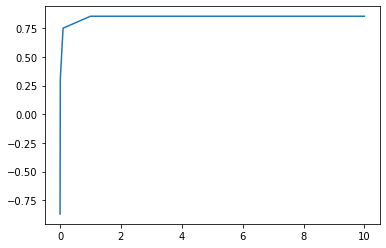

In [ ]:
pf=PolynomialFeatures(degree=3)
alphas=np.geomspace(0.001,10,5)
scores=[]
for alpha in alphas:
    rid=Ridge(alpha,max_iter=100000)
    estimator=Pipeline([('make_higher_degree',pf),('scaler',s),('Ridge regression',rid)])
    predictions=cross_val_predict(estimator,x,y,cv=kf)
    score=r2_score(y,predictions)
    scores.append(score)
plt.plot(alphas,scores)
scores


**GRID SEARCH CV**

to show you how we can use Grid Search CV to take everything that we just learnt with all the four loops, how we went with four loops for the Kfolds, and how we pass that through to cross val predict to make that more succinct. Now we are using the four loop through each one of our hyper-parameters, and then passing through cross val predicts, how we can do all of that in just one step using Grid Search CV.

In [ ]:
from sklearn.model_selection import GridSearchCV
estimator=Pipeline([('polynomial_features',PolynomialFeatures()),('scaler',StandardScaler()),('Ridge_regression',Ridge())])
params={
    'polynomial_features__degree':[1,2,3],
    'Ridge_regression__alpha':np.geomspace(4,20,30)
}
grid=GridSearchCV(estimator,params,cv=kf)

In [ ]:
estimator.fit(x,y)

Pipeline(steps=[('polynomial_features', PolynomialFeatures()),
                ('scaler', StandardScaler()), ('Ridge_regression', Ridge())])

In [ ]:
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'polynomial_features', 'scaler', 'Ridge_regression', 'polynomial_features__degree', 'polynomial_features__include_bias', 'polynomial_features__interaction_only', 'polynomial_features__order', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'Ridge_regression__alpha', 'Ridge_regression__copy_X', 'Ridge_regression__fit_intercept', 'Ridge_regression__max_iter', 'Ridge_regression__normalize', 'Ridge_regression__positive', 'Ridge_regression__random_state', 'Ridge_regression__solver', 'Ridge_regression__tol'])

In [ ]:
estimator.score(x,y)

0.9112630335229069

In [ ]:
grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72011, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('Ridge_regression', Ridge())]),
             param_grid={'Ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ]),
                         'polynomial_features__degree': [1, 2, 3]})

In [ ]:
grid.best_score_

0.8601653498266836

In [ ]:
grid.best_params_

{'Ridge_regression__alpha': 4.0, 'polynomial_features__degree': 3}

In [ ]:
y_predict=grid.predict(x)

In [ ]:
r2_score(y,y_predict)

0.9371998534579354

In [ ]:
grid.best_estimator_.named_steps['Ridge_regression'].coef_

array([ 0.00000000e+00,  6.68250560e-02, -4.02437693e-01, -3.36562335e-01,
        8.97450485e-02,  1.26048617e-01,  2.13159436e+00,  1.11865845e+00,
       -1.30664235e+00,  1.27880901e+00,  2.06486257e-01,  1.01466852e-02,
        8.50846904e-01,  1.72105441e-01,  7.09048168e-02, -8.14157563e-02,
        1.69197919e-01,  1.02819052e+00, -2.29055044e-01,  1.27853996e-01,
       -8.07122112e-02, -2.43093961e-01, -9.25607273e-02,  1.92646670e-02,
        3.08201775e-02,  2.90142560e-01,  1.34300197e-01, -6.84567622e-02,
       -3.19459300e-01, -2.77519399e-02, -1.96327085e-01,  2.11686939e-02,
       -1.33790119e-01, -2.72500635e-01, -9.06495871e-02, -1.50347189e-01,
       -7.62178275e-02, -2.45863879e-01, -4.44323971e-01,  3.06933639e-01,
       -9.30007672e-02, -5.09965898e-02,  7.32361439e-03,  2.98896745e-01,
       -1.14438166e+00,  6.47363815e-01,  6.10602237e-01, -3.70080218e-01,
        1.65677405e-01, -7.94538772e-01,  8.97450485e-02, -6.50826118e-02,
       -1.29051668e-01,  

# **Polynomial Features and Regularization**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/x_y_sinusoiddata.csv")

[Text(0, 0.5, 'y_data'), Text(0.5, 0, 'x_data')]

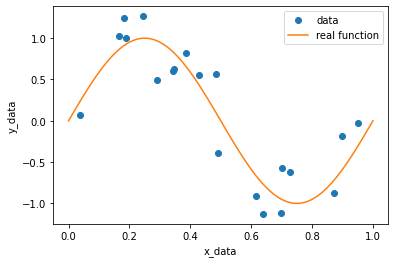

In [ ]:
x_real=np.linspace(0,1,100)
y_real=np.sin(2*np.pi*x_real)
ax=data.plot('x','y',ls='',marker='o',label='data')
ax.plot(x_real,y_real,ls='-',marker='',label='real function')
ax.legend()
ax.set(xlabel='x_data',ylabel='y_data')

In [ ]:
data.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [ ]:
data['y']

0     0.066391
1     1.027483
2     1.245302
3     1.004781
4     1.264121
5     0.498330
6     0.597502
7     0.629410
8     0.822705
9     0.557581
10    0.565053
11   -0.393222
12   -0.912892
13   -1.128250
14   -1.110455
15   -0.570343
16   -0.620209
17   -0.873236
18   -0.187472
19   -0.025815
Name: y, dtype: float64

In [ ]:
data[['x']]

,x
0,0.038571
1,0.166776
2,0.183153
3,0.187359
4,0.243116
5,0.289299
6,0.342805
7,0.345499
8,0.386477
9,0.430047


[Text(0, 0.5, 'ydata'), Text(0.5, 0, 'xdata')]

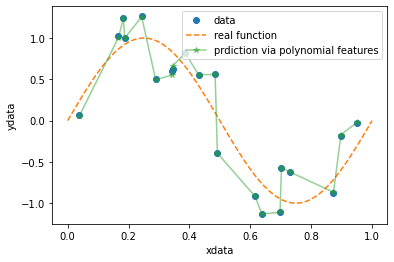

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=20)
lr=LinearRegression()
x_data=data[['x']]
y_data=data['y']
x_poly=pf.fit_transform(x_data)
lr=lr.fit(x_poly,y_data)
y_pred=lr.predict(x_poly)
plt.plot(x_data,y_data,ls="",marker='o',label='data',alpha=1)
plt.plot(x_real,y_real,ls="--",marker="",label='real function')
plt.plot(x_data,y_pred,marker='*',label='prdiction via polynomial features',alpha=0.5)
plt.legend()
ax=plt.gca()
ax.set(xlabel='xdata',ylabel='ydata')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.470e-01, tolerance: 1.223e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[Text(0, 0.5, 'ydata'), Text(0.5, 0, 'xdata')]

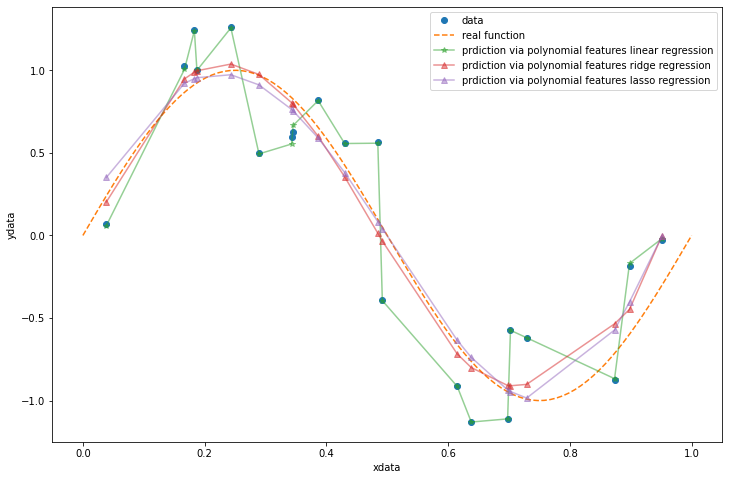

In [ ]:
from sklearn.linear_model import Ridge,Lasso
rr=Ridge(alpha=0.0001)
rr=rr.fit(x_poly,y_data)
y_pred_rr=rr.predict(x_poly)
lasso=Lasso(alpha=0.0001)
lasso=lasso.fit(x_poly,y_data)
y_pred_lasso=lasso.predict(x_poly)
plt.figure(figsize=(12,8))
plt.plot(x_data,y_data,ls="",marker='o',label='data',alpha=1)
plt.plot(x_real,y_real,ls="--",marker="",label='real function')
plt.plot(x_data,y_pred,marker='*',label='prdiction via polynomial features linear regression',alpha=0.5)
plt.plot(x_data,y_pred_rr,marker='^',label='prdiction via polynomial features ridge regression',alpha=0.5)
plt.plot(x_data,y_pred_lasso,marker='^',label='prdiction via polynomial features lasso regression',alpha=0.5)
plt.legend()
ax=plt.gca()
ax.set(xlabel='xdata',ylabel='ydata')

In [ ]:
rr.coef_

array([  0.        ,  10.58013667, -23.07509286,  -2.47360015,
         7.534027  ,   9.01212747,   6.8114497 ,   3.38843217,
         0.04226825,  -2.52897092,  -4.04966872,  -4.53954464,
        -4.18960957,  -3.25991043,  -2.01047913,  -0.66335135,
         0.61255068,   1.70231473,   2.53847305,   3.09147516,
         3.35984196])

In [ ]:
coefficients1=pd.DataFrame()
coefficients1['ridge regression']=rr.coef_
coefficients1.describe()

,ridge regression
count,21.000000
mean,0.089660
std,6.902303
min,-23.075093
25%,-2.528971
50%,0.042268
75%,3.359842
max,10.580137


ravel just to ensure its 1 dimension array
it makes 20x3 matrix into 60x1

In [ ]:
coefficients=pd.DataFrame()
coefficients['linear regression']=lr.coef_.ravel()
coefficients['ridge regression']=rr.coef_.ravel()
coefficients['lasso regression']=lasso.coef_.ravel()
coefficients=coefficients.applymap(abs)
coefficients.describe()

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.761504e+13,4.545873,2.167284
std,6.017426e+13,5.094313,4.706731
min,1.610728e+07,0.000000,0.000000
25%,3.402091e+12,2.010479,0.000000
50%,3.614874e+13,3.259910,0.252181
75%,1.068696e+14,4.539545,1.641353
max,1.652485e+14,23.075093,20.176708


In [ ]:
(coefficients>0).sum()

linear regression    21
ridge regression     20
lasso regression     15
dtype: int64

In [ ]:
lr.coef_.ravel()

array([ 3.58398492e+12,  1.61072766e+07, -4.63690451e+08,  7.64321539e+09,
       -8.23356976e+10,  6.20682350e+11, -3.40209121e+12,  1.38339410e+13,
       -4.19727057e+13,  9.40475536e+13, -1.49915109e+14,  1.52100718e+14,
       -5.47537456e+13, -8.95041408e+13,  1.41158119e+14, -3.55693744e+13,
       -1.15907659e+14,  1.65248524e+14, -1.06869606e+14,  3.61487444e+13,
       -5.18871171e+12])

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
alphas=[0.005,0.05,0.1,0.3,1,3,5,10,15,30,80]
ridgeCV=RidgeCV(alphas=alphas,cv=4).fit(x_poly,y_data)
ridgeCV_mse= mean_squared_error(y_data,ridgeCV.predict(x_poly))
ridgeCV_rmse=np.sqrt(ridgeCV_mse)
print(ridgeCV.alpha_,ridgeCV_rmse)


3.0 0.597887131118554


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
alphas=[0.005,0.05,0.1,0.3,1,3,5,10,15,30,80]
lassoCV=LassoCV(alphas=alphas,cv=4).fit(x_poly,y_data)
lassoCV_mse= mean_squared_error(y_data,lassoCV.predict(x_poly))
lassoCV_rmse=np.sqrt(lassoCV_mse)
print(lassoCV.alpha_,lassoCV_rmse)

0.05 0.5723797812008092


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.424e-03, tolerance: 1.051e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
from sklearn.linear_model import ElasticNetCV
l1_ratios=np.linspace(0.1,0.9,9)
elasticnetCV=ElasticNetCV(alphas=alphas,l1_ratio=l1_ratios,max_iter=1e4).fit(x_poly,y_data)
elasticnetCV_mse= mean_squared_error(y_data,elasticnetCV.predict(x_poly))
elasticnetCV_rmse=np.sqrt(elasticnetCV_mse)
print(elasticnetCV.alpha_,elasticnetCV_rmse)


0.05 0.5767789854414355
